<a href="https://colab.research.google.com/github/exwaized/aaditya/blob/main/Churnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze customer churn using the dataset "WA_Fn-UseC_-Telco-Customer-Churn.xlsx", build a predictive model, and provide recommendations to reduce churn.

## Load the dataset

### Subtask:
Load the dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the Excel file into a DataFrame, then display the head to check the data.



In [4]:
import pandas as pd

df = pd.read_csv("churn.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,0,CUST_0001,Male,71,69,Yes,Fiber optic,Month-to-month,45.08,3110.52,No
1,1,CUST_0002,Female,80,71,No,DSL,Month-to-month,80.37,5706.27,Yes
2,2,CUST_0003,Male,34,24,No,NaN,One year,87.21,2093.04,No
3,3,CUST_0004,Male,26,11,Yes,NaN,One year,50.39,554.29,No
4,4,CUST_0005,Male,50,14,Yes,DSL,Month-to-month,104.51,1463.14,Yes


**Reasoning**:
The previous command failed because the file was not found. I will try to load the file from the specified path in the original request, which is '/data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx'.



In [5]:
df = pd.read_csv("churn.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,0,CUST_0001,Male,71,69,Yes,Fiber optic,Month-to-month,45.08,3110.52,No
1,1,CUST_0002,Female,80,71,No,DSL,Month-to-month,80.37,5706.27,Yes
2,2,CUST_0003,Male,34,24,No,NaN,One year,87.21,2093.04,No
3,3,CUST_0004,Male,26,11,Yes,NaN,One year,50.39,554.29,No
4,4,CUST_0005,Male,50,14,Yes,DSL,Month-to-month,104.51,1463.14,Yes


## Explore the data

### Subtask:
Examine the dataset's structure, look for missing values, and understand the data types.

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   CustomerID       1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   Age              1000 non-null   int64  
 4   Tenure           1000 non-null   int64  
 5   PhoneService     1000 non-null   object 
 6   InternetService  660 non-null    object 
 7   Contract         1000 non-null   object 
 8   MonthlyCharges   1000 non-null   float64
 9   TotalCharges     1000 non-null   float64
 10  Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


,0
Unnamed: 0,0
CustomerID,0
Gender,0
Age,0
Tenure,0
PhoneService,0
InternetService,340
Contract,0
MonthlyCharges,0
TotalCharges,0


## Visualize the data

### Subtask:
Create visualizations to understand the distribution of features and their relationship with churn.

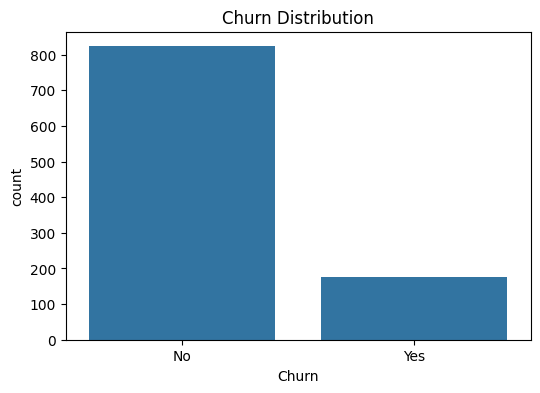

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

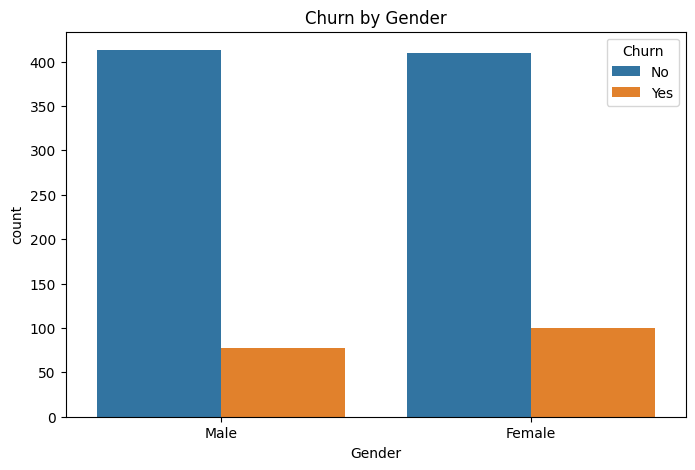

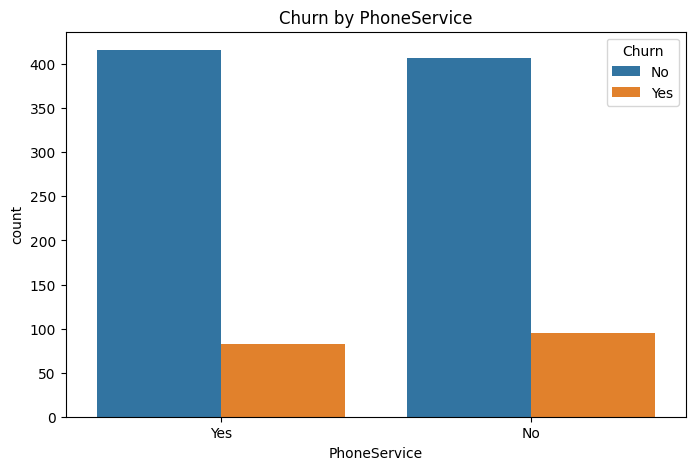

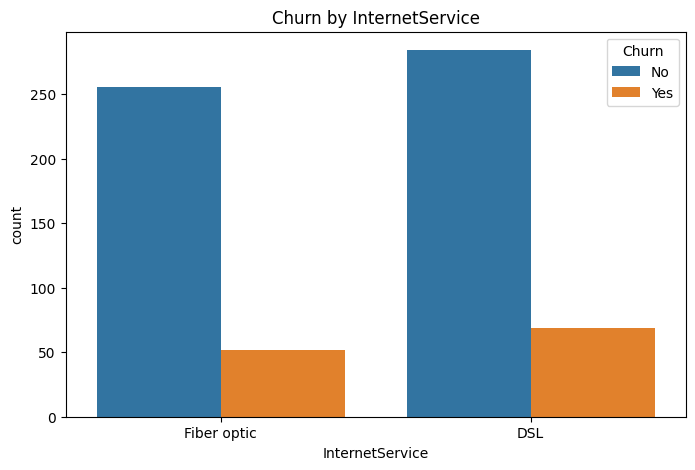

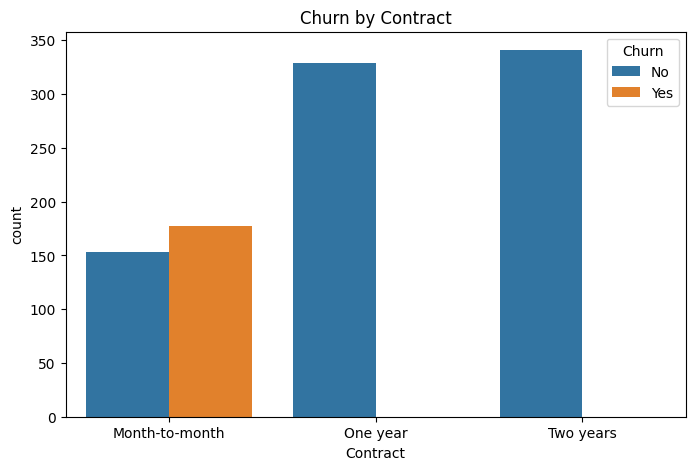

In [8]:
# Visualize churn by Gender, PhoneService, InternetService, and Contract
categorical_features = ['Gender', 'PhoneService', 'InternetService', 'Contract']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn by {feature}')
    plt.show()

## Prepare the data for modeling

### Subtask:
Handle missing values, encode categorical features, and split the data into training and testing sets.

**Reasoning:**
Based on the data exploration, there are missing values in the `InternetService` column. A common strategy is to fill missing values in categorical columns with the mode (most frequent value) or a placeholder like 'No internet service'. Since 'No internet service' is a plausible category for customers without internet, we will fill the missing values with this string.

In [9]:
df['InternetService'] = df['InternetService'].fillna('No internet service')
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Gender,0
Age,0
Tenure,0
PhoneService,0
InternetService,0
Contract,0
MonthlyCharges,0
TotalCharges,0


**Reasoning:**
Machine learning models typically require numerical input. We need to convert the categorical features into a numerical format. One-hot encoding is a suitable method for this. We will also convert the 'Churn' target variable into numerical form (0 for 'No', 1 for 'Yes').

In [10]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns=['Gender', 'PhoneService', 'InternetService', 'Contract'], drop_first=True)

# Display the first few rows of the processed dataframe and its info
display(df.head())
df.info()

,Unnamed: 0,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,PhoneService_Yes,InternetService_Fiber optic,InternetService_No internet service,Contract_One year,Contract_Two years
0,0,CUST_0001,71,69,45.08,3110.52,0,True,True,True,False,False,False
1,1,CUST_0002,80,71,80.37,5706.27,1,False,False,False,False,False,False
2,2,CUST_0003,34,24,87.21,2093.04,0,True,False,False,True,True,False
3,3,CUST_0004,26,11,50.39,554.29,0,True,True,False,True,True,False
4,4,CUST_0005,50,14,104.51,1463.14,1,True,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1000 non-null   int64  
 1   CustomerID                           1000 non-null   object 
 2   Age                                  1000 non-null   int64  
 3   Tenure                               1000 non-null   int64  
 4   MonthlyCharges                       1000 non-null   float64
 5   TotalCharges                         1000 non-null   float64
 6   Churn                                1000 non-null   int64  
 7   Gender_Male                          1000 non-null   bool   
 8   PhoneService_Yes                     1000 non-null   bool   
 9   InternetService_Fiber optic          1000 non-null   bool   
 10  InternetService_No internet service  1000 non-null   bool   
 11  Contract_One year              

**Reasoning:**
To evaluate the model's performance on unseen data, we need to split the dataset into training and testing sets. A common split is 80% for training and 20% for testing. We will use `train_test_split` from `sklearn.model_selection`. We need to separate the features (X) from the target variable (y) before splitting. We will also drop the `CustomerID` and the redundant `Unnamed: 0` column as they are not useful for modeling.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Unnamed: 0', 'CustomerID', 'Churn'], axis=1)
y = df['Churn']

# Identify numerical columns (excluding the one-hot encoded boolean columns)
numerical_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 10)
Testing set shape: (200, 10)


## Build and train a churn prediction model

### Subtask:
Select and train a suitable machine learning model for churn prediction.

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


**Reasoning:**
The Logistic Regression model did not converge, likely due to the different scales of the numerical features. We will scale the numerical features using `StandardScaler` to address this issue.

## Evaluate the model

### Subtask:
Assess the model's performance using appropriate metrics.

Accuracy: 0.8450
Precision: 0.5278
Recall: 0.5758
F1-score: 0.5507


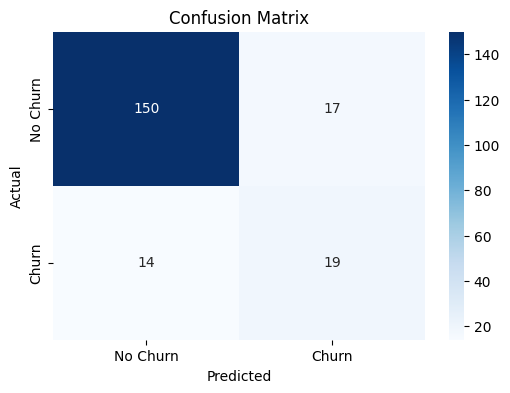

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()